# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

> Previamente abrí los datasets utilizando un editor de texto y observé que los separadores no son los típicos, por lo que usaré el parametro adecuado para ello.
> 1. Importaré la librería pandas
> 2. Asignaré cada dataset leído a una variable
> 3. Usaré el método info para tener un vistazo rápido de cada dataset

In [ ]:
# Importar librerías
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
# Leer conjuntos de datos en los DataFrames
# Previamente leí los datasets en un editor de texto y observé que los delimitadores son ; por lo que usaré el parámetro sep = ';'
# Cada dataset lo guardaré en una variable 

orders = pd.read_csv('/datasets/instacart_orders.csv', sep = ';') # Dataframe de instacart_orders.csv

products = pd.read_csv('/datasets/products.csv', sep = ';') # Dataframe de products.csv

order_products = pd.read_csv('/datasets/order_products.csv', sep = ';') # Dataframe de order_products.csv 

aisles = pd.read_csv('/datasets/aisles.csv', sep = ';') # Dataframe de aisles.csv

departments = pd.read_csv('/datasets/departments.csv', sep = ';') # Dataframe de departments.csv

In [3]:
# Mostrar información del DataFrame 

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


*Hay valores ausentes en la columna 'days_since_prior_order'. Esto podría deberse a los usuarios nuevos, que no habían realizado una orden previa.*

In [4]:
# Mostrar información del DataFrame

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


*Hay valores ausentes en la columna 'product_name'.

In [5]:
# Mostrar información del DataFrame

aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# Mostrar información del DataFrame

departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# Mostrar información del DataFrame
# En un primer vistazo a la información, el método info() no mostró el recuento de valores no ausentes, por lo que agregué el parametro show_counts = True

order_products.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


*Hay valores ausentes en la columna 'add_to_cart_order'*

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


> Los separadores utilizados en cada dataset no eran los convencionales, por lo que utilizar un editor de texto para visualizarlos previamente ayudó para escribir el código adecuado para la lectura de cada uno. 
> En todos los dataframe, los ID son valores int64.

> Hay valores ausentes en tres dataframes:
> 1. instacart_orders (orders)
> 2. products
> 3. order_products

> Cuando un archivo tiene demasiadas filas, utilizar el parámetro *show_counts = True* es lo adecuado para tener la información completa.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

> 1. Para verificar que todos los ID sean números enteros, aprovecharé la información obtenida en el paso anterior. 
> 2. Para el tratamiento de los datos duplicados usaré el método duplicated() para filtrar en cada dataframe las filas totalmente duplicadas y tomar una decisión sobre dejarlas o eliminarlas, de acuerdo a los datos. Buscaré, también, duplicados ímplicitos.
> 3. Para el tratamiento de los datos ausentes, usaré el método isna() y analizaré si existe alguna relación entre estos y alguna otra columna, para elminarlos o cambiarlos 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados

print(orders.duplicated().sum()) # Contabilizo los valores duplicados totalmente

orders[orders.duplicated()] # Filtro y muestro los valores duplicados

15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

> Hay 15 líneas duplicadas y todas coinciden en el día del pédido (miércoles) y la hora (2:00 am)

In [9]:
# Basándote en tus hallazgos,

# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

orders.query('order_dow == 3 & order_hour_of_day == 2') # Busco en el dataframe usando el método query

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

> Hay 15 líneas duplicadas y 121 pedidos realizados el miércoles a las 2 am, por lo que no todos los pedidos de esta fecha y hora son valores duplicados

In [10]:
# Elimina los pedidos duplicados

orders.drop_duplicates(inplace = True)

In [11]:
# Vuelve a verificar si hay filas duplicadas

orders.duplicated().sum()

0

In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

orders['order_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

> Había 15 filas de órdenes duplicadas, todas coincidian en día y hora. Ya que no todos los pedidos de ese día y hora eran valores duplicados totalmente, decidí eliminar los que sí lo eran.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas

products.duplicated().sum()

0

In [14]:
# Revisa únicamente si hay ID de departamentos duplicados

products['department_id'].duplicated().sum()

49673

In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor

display(products) # Muestro el dataframe para observar la necesidad de cambiar el nombre de los productos a mayúsculas

print('productos duplicados:', products['product_name'].duplicated().sum()) # Antes de cambiar a mayúsculas, cuento los duplicados en los nombres de productos

products['product_name'] = products['product_name'].str.upper() # Cambio el nombre de los productos a mayúsculas

print('productos duplicados en mayúsculas:', products['product_name'].duplicated().sum()) # Cuento los productos duplicados, después del cambio a mayúsculas

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


productos duplicados: 1257
productos duplicados en mayúsculas: 1361


In [16]:
# Muestro el dataframe en mayúsculas

products

,product_id,product_name,aisle_id,department_id
0,1,CHOCOLATE SANDWICH COOKIES,61,19
1,2,ALL-SEASONS SALT,104,13
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,94,7
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,38,1
4,5,GREEN CHILE ANYTIME SAUCE,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [17]:
# Revisa si hay nombres duplicados de productos no faltantes

# Aplico el método value_counts() al dataframe modificado a mayúsculas para visualizar algunos productos y cuántas veces aparecen

products['product_name'].value_counts() 

GREEN TEA WITH GINSENG AND HONEY                            3
ORIGINAL PANCAKE & WAFFLE MIX                               2
GENTLE AND PREDICTABLE OVERNIGHT RELIEF LAXATIVE TABLETS    2
WILD SARDINES IN SPRING WATER                               2
AGED BALSAMIC VINEGAR OF MODENA                             2
                                                           ..
NATURE FUSION SMOOTHING SHAMPOO WITH AVOCADO OIL            1
FRAGRANCE FREE PURE OLIVE OIL SOAP BARS                     1
NASAL DECONGESTANT SPRAY                                    1
ORGANIC NATURAL CANE SUGAR JUG                              1
FRUITIES ON-THE-GO APPLE- MANGO & CARROT PUREE STAGE 2      1
Name: product_name, Length: 48332, dtype: int64

In [18]:
# Elimino los productos duplicados no faltantes, aplicando drop_duplicates() en la columna 'product_name'

products.drop_duplicates(inplace = True)

# Vuelvo a contar los valores únicos de la columna product_name 

products['product_name'].value_counts()

GREEN TEA WITH GINSENG AND HONEY                            3
ORIGINAL PANCAKE & WAFFLE MIX                               2
GENTLE AND PREDICTABLE OVERNIGHT RELIEF LAXATIVE TABLETS    2
WILD SARDINES IN SPRING WATER                               2
AGED BALSAMIC VINEGAR OF MODENA                             2
                                                           ..
NATURE FUSION SMOOTHING SHAMPOO WITH AVOCADO OIL            1
FRAGRANCE FREE PURE OLIVE OIL SOAP BARS                     1
NASAL DECONGESTANT SPRAY                                    1
ORGANIC NATURAL CANE SUGAR JUG                              1
FRUITIES ON-THE-GO APPLE- MANGO & CARROT PUREE STAGE 2      1
Name: product_name, Length: 48332, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

> Inicialmente habían 1257 nombres de productos duplicados, que después del cambio a mayúsculas se hicieron 1361. Al contar los valores únicos de cada producto, encontré que algunos se repetían hasta 3 veces. Después de eliminar los duplicados, cada producto aparece una sola vez.

### `departments` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas

departments.duplicated().sum()

0

In [20]:
# Revisa únicamente si hay IDs duplicadas de departamentos

departments['department_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

> No hay valores duplicados en este dataframe.

### `aisles` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()

0

In [22]:
# Revisa únicamente si hay IDs duplicadas de pasillos
aisles['aisle_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

> No hay valores duplicados en el dataframe aisles

### `order_products` data frame

In [23]:
# Revisa si hay filas totalmente duplicadas
order_products.duplicated().sum()

0

In [24]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

print(len(order_products)) # Cuento las filas totales

order_products.nunique() # Muestro la cantidad de valores únicos en el dataframe

4545007


order_id             450046
product_id            45573
add_to_cart_order        64
reordered                 2
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

> Hay 450046 order_id únicos y 45573 productos en total. Cada pedido único puede contener más de un producto, y cada producto único puede estar más de un pedido, por lo que no hay necesidad de eliminar los duplicados.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [25]:
# Encuentra los valores ausentes en la columna 'product_name'

print(products['product_name'].isna().sum()) # Cuento los valores duplicados 

products[products['product_name'].isna()] # Muestro los valores duplicados en el dataframe

1258


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

> Hay 1258 valores ausentes en la columna product_name, parece que todos relacionados con el pasillo 100, departamento 21

In [26]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

# Busco la coincidencia entre valores ausentes en la columna product_name y aisle_id = 100 con el método query()

products.query('product_name.isna() == True & aisle_id == 100') 

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

> Todos los valores ausentes están relacionados con el pasillo 100, y todos los relacionados con este pasillo, también están relacionados con el departamento 21

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

# Primero muestro el nombre de las columnas para recordarlos

print(aisles.columns)
print()
print(departments.columns)

Index(['aisle_id', 'aisle'], dtype='object')

Index(['department_id', 'department'], dtype='object')


In [28]:
# Filtro el dataframe por el id 100

aisles[aisles['aisle_id'] == 100]

,aisle_id,aisle
99,100,missing


In [29]:
# Filtro el dataframe por el id 21

departments[departments['department_id'] == 21]

,department_id,department
20,21,missing


Describe brevemente cuáles son tus hallazgos.

El pasillo 100 y el departamento 21 tienen la misma descripción: missing.

In [30]:
# Completa los nombres de productos ausentes con 'Unknown'

products['product_name'].fillna('Unknown', inplace = True) # Aplico el método fillna()

products['product_name'].isna().sum() # Corroboro que los datos ausentes ya no existan

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

> Al inicio, se encontraron 1258 valores ausentes en la columna product_name. Varios productos se relacionaban con el pasillo 100 y departamento 21, que representa productos en desabasto. Después del cambio a 'Unknown', los valores ausentes son 0.

### `orders` data frame

In [31]:
# Encuentra los valores ausentes

print(orders['days_since_prior_order'].isna().sum()) # Cuento los valores duplicados 

orders[orders['days_since_prior_order'].isna()] # Muestro los valores duplicados en el dataframe

28817


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [32]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

orders.query('days_since_prior_order.isna() == True & order_number == 1')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


Describe brevemente tus hallazgos y lo que hiciste con ellos.

> Hay 28817 valores ausentes en la columna 'days_since_prior_order', todos relacionados con el valor 1 en la columna 'order_number', lo cual quiere decir que esa compra es la primera del cliente y, por lo tanto, no existen días previos desde la útlima compra. Decidí cambiar los valores ausentes por 0, para indicar que no ha pasado ningún día desde la última compra.

### `order_products` data frame

In [33]:
order_products.head() # Muestro las primeras 5 filas

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [34]:
# Encuentra los valores ausentes

order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [35]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos.

> Hay 836 valores ausentes en la columna 'add_to_cart_order', cuyos valores van de 1 a 64.

In [36]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

order_na = order_products.loc[order_products['add_to_cart_order'].isna(),'order_id']
order_na

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64

In [37]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

order_products.groupby(order_na)['product_id'].count().sort_values()

order_id
9310.0        1
747668.0      1
1598369.0     1
1677118.0     1
2170451.0     1
             ..
1959075.0    34
171934.0     40
2136777.0    44
3308010.0    51
61355.0      63
Name: product_id, Length: 70, dtype: int64

Describe brevemente cuáles son tus hallazgos.

> Existen 836 valores ausentes en la columna 'add_to_cart_order'. En esta columna, los valores númericos van de 1 a 64 y para mayores de 64, aparece un NaN. Al agrupar  los pedidos con datos ausentes por ID y posteriormente contar los productos en cada uno de esos pedidos, se obtuvo como resultado la cantidad de productos que coincidia con un valor NaN, por lo que las ordenes con valores ausentes van desde 65 (64 + 1) hasta 127 (64 + 63) productos.

In [38]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

order_products['add_to_cart_order'].fillna(999, inplace = True) # Aplico el método fillna()

order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int') # Convierto la columna a tipo entero usando astype()

order_products['add_to_cart_order'].isna().sum() # Corroboro que los datos ausentes ya no existan

0

In [39]:
#Corroboro el cambio a entero en la columna 'add_to_cart_order' y los cambios en valores no nulos con el método info()

order_products.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

> En este dataframe había 836 valores ausentes en la columna 'add_to_cart_order', todos ellos superando la cantidad de productos máxima (64) por pedido. Reemplacé los valores ausentes por 999 y convertí la columna a tipo entero para facilitar posteriores análisis. 

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


> Para encontrar los datos duplicados no fue suficiente solo con contabilizarlos, sino también observar algunas filas de datos y encontrar relaciones entre columnas; en otros casos se necesitó de hacer cambios a mayúsculas para encontrarlos. 

> En cuanto a los datos ausentes, el tratamiento fue similar, en cuanto a no solo contar cuántos había, sino en analizar la información de la tabla, encontrar relaciones entre las columnas e incluso relaciones entre los distintos dataframes, para tomar una decisión de qué hacer con esos datos ausentes: reemplazarlos por datos numéricos o por datos de cadena.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [40]:
# Utilizo el método describe() para obtener los valores max y min de todas las columnas

orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789520e+05,478952.000000,478952.000000,478952.000000,478952.000000,450135.000000
mean,1.709953e+06,102966.654911,17.157563,2.775051,13.447034,11.101814
std,9.869537e+05,59525.292863,17.704457,2.045901,4.224567,9.190004
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564698e+05,51413.750000,5.000000,1.000000,10.000000,4.000000
50%,1.709521e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.563002e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


Escribe aquí tus conclusiones

> Los valores de las columnas 'order_dow' y 'order_hour_of_day' son razonables

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

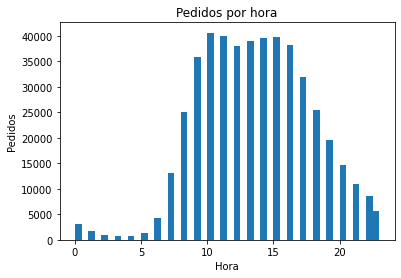

In [ ]:
orders['order_hour_of_day'].plot(kind='hist', bins = 46, title='Pedidos por hora')

plt.xlabel("Hora")
plt.ylabel("Pedidos")
plt.show()

Escribe aquí tus conclusiones

> La mayor cantidad de pedidos se realiza entre las 9:00 y las 16:00. Las 10:00 am y 11:00 am son las horas con mayores pedidos.

### [A3] ¿Qué día de la semana compran víveres las personas?

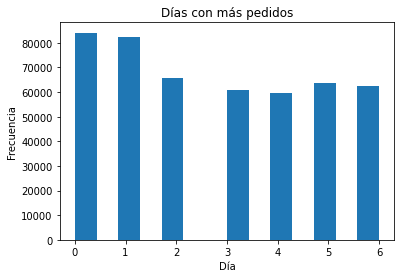

In [42]:
orders['order_dow'].plot(kind='hist', bins = 14, title='Días con más pedidos')

plt.xlabel("Día")
plt.ylabel("Frecuencia")
plt.show()

Escribe aquí tus conclusiones

> La mayor cantidad de pedidos se realiza los domingos y lunes

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

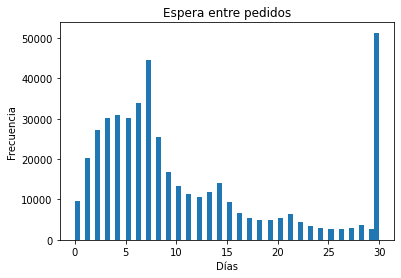

In [43]:
orders['days_since_prior_order'].plot(kind='hist', bins = 60, title='Espera entre pedidos')

plt.xlabel("Días")
plt.ylabel("Frecuencia")
plt.show()

Escribe aquí tus conclusiones

> La mayoría de las personas realiza un pedido al mes o uno cada semana. Parece que hay un número alto de personas que esperan 0 días, pero estos datos también incluyen los pedidos de primera vez. 

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

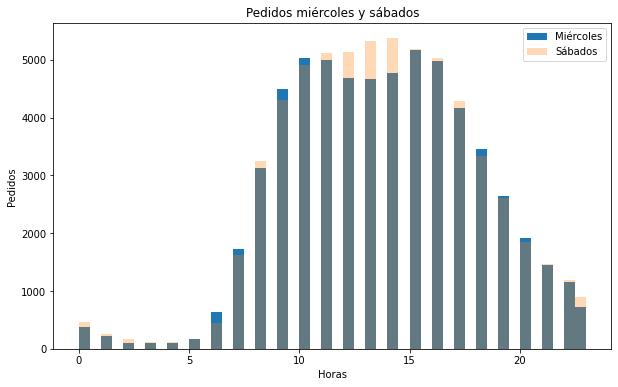

In [44]:
# Gráfico para los días miércoles

orders[orders['order_dow'] == 3]['order_hour_of_day'].plot(kind='hist', bins = 46, title='Pedidos miércoles y sábados', figsize = [10,6])

#  Gráfico para los días sábados

orders[orders['order_dow'] == 6]['order_hour_of_day'].plot(kind='hist', bins = 46, title='Pedidos miércoles y sábados', figsize = [10,6], alpha=0.3)

plt.xlabel("Horas")
plt.ylabel("Pedidos")
plt.legend(['Miércoles', 'Sábados'])
plt.show()

Escribe aquí tus conclusiones

> Las distribuciones son similares, a excepción de que en los días sábados hay más pedidos realizados entre las 11:00 y las 14:00, que en los miércoles

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

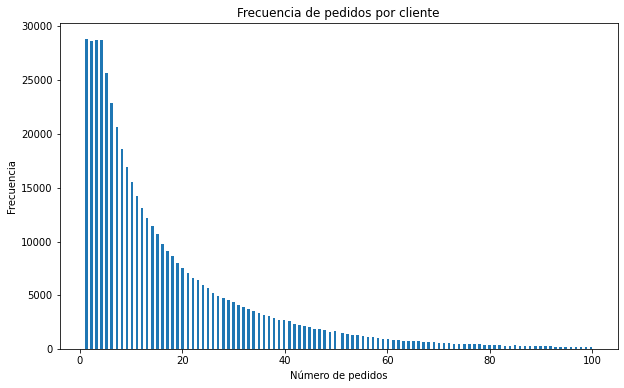

In [45]:
# Realizo un histograma para la columna 'order_number', que contiene el número de veces que cada cliente ha realizado un pedido

orders['order_number'].plot(kind='hist', bins = 200, title='Frecuencia de pedidos por cliente', figsize = [10,6])

plt.xlabel("Número de pedidos")
plt.ylabel("Frecuencia")
plt.show()

Escribe aquí tus conclusiones

> La mayoría de los clientes realizan 4 pedidos 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [46]:
# Voy a hacer un cruce entre la información de las tablas order_products y products

# De la tabla order_products necesito la columna 'product_id' y de la tabla products necesito la columna 'product_name'

display(order_products.head())

products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


,product_id,product_name,aisle_id,department_id
0,1,CHOCOLATE SANDWICH COOKIES,61,19
1,2,ALL-SEASONS SALT,104,13
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,94,7
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,38,1
4,5,GREEN CHILE ANYTIME SAUCE,5,13


In [47]:
# Hago una fusión manteniendo todos los valores de order_products y solo los que coinciden de la tabla products

df_merged = order_products.merge(products, on = 'product_id')

df_merged # Muestro el resultado de la fusión

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,147172,11440,7,1,CHICKEN BREAST TENDERS BREADED,129,1
2,3341719,11440,4,1,CHICKEN BREAST TENDERS BREADED,129,1
3,1938779,11440,8,1,CHICKEN BREAST TENDERS BREADED,129,1
4,1728338,11440,23,0,CHICKEN BREAST TENDERS BREADED,129,1
...,...,...,...,...,...,...,...
4545002,267402,45226,14,0,SWEET TERIYAKI CHICKEN OVEN SAUCE,5,13
4545003,2621676,25201,10,0,CRISP WATERS CANDLE SCENTS,101,17
4545004,937623,49153,2,0,SHINE COLLECTION BRILLANCE SHAMPOO,22,11
4545005,532895,8182,1,0,TOTAL MINT STRIPE GEL TOOTHPASTE,20,11


In [48]:
# Creo una variable que guarde la agrupación para los productos que más pedidos tienen, ordenados en forma descendente

populars = df_merged.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending=False).reset_index()

# Muestro las primeras 20 posiciones de la agrupación 

populars.head(20)

,product_id,product_name,order_id
0,24852,BANANA,66050
1,13176,BAG OF ORGANIC BANANAS,53297
2,21137,ORGANIC STRAWBERRIES,37039
3,21903,ORGANIC BABY SPINACH,33971
4,47209,ORGANIC HASS AVOCADO,29773
5,47766,ORGANIC AVOCADO,24689
6,47626,LARGE LEMON,21495
7,16797,STRAWBERRIES,20018
8,26209,LIMES,19690
9,27845,ORGANIC WHOLE MILK,19600


In [49]:
# Cambio el nombre de la columna de conteo por 'orders'

populars = populars.rename(columns = {'order_id':'orders'})

# Muestro el cambio

populars.head(20)

,product_id,product_name,orders
0,24852,BANANA,66050
1,13176,BAG OF ORGANIC BANANAS,53297
2,21137,ORGANIC STRAWBERRIES,37039
3,21903,ORGANIC BABY SPINACH,33971
4,47209,ORGANIC HASS AVOCADO,29773
5,47766,ORGANIC AVOCADO,24689
6,47626,LARGE LEMON,21495
7,16797,STRAWBERRIES,20018
8,26209,LIMES,19690
9,27845,ORGANIC WHOLE MILK,19600


Escribe aquí tus conclusiones

> Los 20 productos más populares son alimentos: frutas, verduras y leche entera

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [50]:
# Utilizaré los datos de la tabla order_products

# Muestro las primeras posiciones 

order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [51]:
# Agrupo los datos por order_id y cuento los product_id para cada uno de ellos

products_by_order = order_products.groupby('order_id')['product_id'].count().sort_values(ascending = False)

products_by_order # Muestro la agrupación

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
2231165      1
816908       1
2230951      1
112056       1
3421079      1
Name: product_id, Length: 450046, dtype: int64

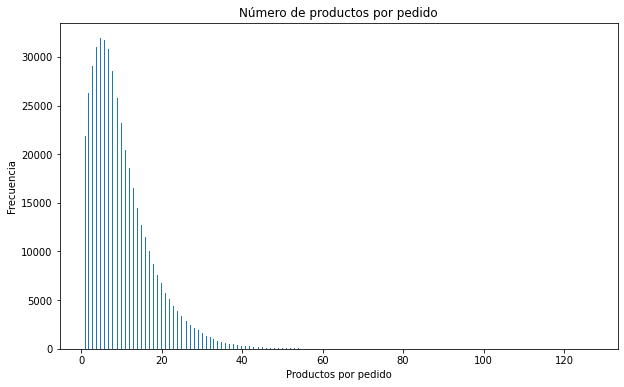

In [52]:
# Realizo un histograma de product_by_order para obtener las distribuciones

products_by_order.plot(kind = 'hist', bins = 500, title = 'Número de productos por pedido', figsize = [10,6])

plt.xlabel("Productos por pedido")
plt.ylabel("Frecuencia")
plt.show()

Escribe aquí tus conclusiones

> La mayoría de los pedidos incluyen entre 4 y 7 artículos

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [53]:
# Vuelvo a usar el dataframe fusionado previamente, que incluye los nombres para cada producto

df_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,147172,11440,7,1,CHICKEN BREAST TENDERS BREADED,129,1
2,3341719,11440,4,1,CHICKEN BREAST TENDERS BREADED,129,1
3,1938779,11440,8,1,CHICKEN BREAST TENDERS BREADED,129,1
4,1728338,11440,23,0,CHICKEN BREAST TENDERS BREADED,129,1


In [54]:
# Agrupo los datos por ID y nombre para cada producto, y sumo los valores de reordered.

products_reordered = df_merged.groupby(['product_id','product_name'])['reordered'].sum().sort_values(ascending = False).reset_index()

products_reordered.head(20)

,product_id,product_name,reordered
0,24852,BANANA,55763
1,13176,BAG OF ORGANIC BANANAS,44450
2,21137,ORGANIC STRAWBERRIES,28639
3,21903,ORGANIC BABY SPINACH,26233
4,47209,ORGANIC HASS AVOCADO,23629
5,47766,ORGANIC AVOCADO,18743
6,27845,ORGANIC WHOLE MILK,16251
7,47626,LARGE LEMON,15044
8,27966,ORGANIC RASPBERRIES,14748
9,16797,STRAWBERRIES,13945


In [55]:
# Muestro de nuevo los 20 productos más populares (los que aparecen en más órdenes) para comparar con los 20 artículos mas resurtidos

populars.head(20)

,product_id,product_name,orders
0,24852,BANANA,66050
1,13176,BAG OF ORGANIC BANANAS,53297
2,21137,ORGANIC STRAWBERRIES,37039
3,21903,ORGANIC BABY SPINACH,33971
4,47209,ORGANIC HASS AVOCADO,29773
5,47766,ORGANIC AVOCADO,24689
6,47626,LARGE LEMON,21495
7,16797,STRAWBERRIES,20018
8,26209,LIMES,19690
9,27845,ORGANIC WHOLE MILK,19600


Escribe aquí tus conclusiones

> Los 5 productos que se piden con mayor frecuencia son los mismos que los 5 productos más populares. En ambos rankings, los productos son frescos (furtas y verduras) y leches. 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [56]:
# Voy a agrupar por product_id, y aplicaré el conteo de cada orden, con la suma de los reordered para cada uno de ellos 

# Vuelvo a usar el dataframe fusionado con los ID y nombres de cada producto (df_merge)

# Utilizaré el método agg para esto

agg_dict = {'order_id':'count','reordered':'sum'}

product_df = df_merged.groupby(['product_id','product_name']).agg(agg_dict) # Para ver id y nombre de cada producto

product_df = product_df.rename(columns = {'order_id':'ordered'}) # Cambio el nombre de la columna por una más descriptiva de la agrupación

product_df

,,ordered,reordered
product_id,product_name,,
1,CHOCOLATE SANDWICH COOKIES,280,158
2,ALL-SEASONS SALT,11,0
3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,42,31
4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WITH VODKA CREAM SAUCE,49,25
7,PURE COCONUT WATER WITH ORANGE,2,1
...,...,...,...
49690,HIGH PERFORMANCE ENERGY DRINK,5,4
49691,ORIGINAL PANCAKE & WAFFLE MIX,72,31
49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,12,5


In [57]:
# Creo una nueva columna que sea igual a la proporcion de resurtido y pedido y la guardo en la variable product_df 

product_df['reordered_proportion'] = product_df['reordered']/product_df['ordered']

product_df

,,ordered,reordered,reordered_proportion
product_id,product_name,,,
1,CHOCOLATE SANDWICH COOKIES,280,158,0.564286
2,ALL-SEASONS SALT,11,0,0.000000
3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,42,31,0.738095
4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WITH VODKA CREAM SAUCE,49,25,0.510204
7,PURE COCONUT WATER WITH ORANGE,2,1,0.500000
...,...,...,...,...
49690,HIGH PERFORMANCE ENERGY DRINK,5,4,0.800000
49691,ORIGINAL PANCAKE & WAFFLE MIX,72,31,0.430556
49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,12,5,0.416667


In [58]:
# Ordeno por tasa de resurtido en forma descendente para conocer los productos con mejor tasa y muestro las primeras 20

product_df.sort_values(by = 'reordered_proportion', ascending = False).head(20)


,,ordered,reordered,reordered_proportion
product_id,product_name,,,
14721,BONE STRENGTH TAKE CARE,1,1,1.0
20949,VANILLA SANDWICH COOKIES,3,3,1.0
6723,PALMIERS- PETITE,10,10,1.0
6732,NATURALLY SPARKLING MINERAL WATER,3,3,1.0
45088,CALIFORNIA DILL POLLEN & GARLIC GOAT CHEESE & OLIVE OIL INFUSION,1,1,1.0
45078,POMEGRANATEA,1,1,1.0
21016,PARCHMENT LINED 8 IN X 3.75 IN X 2.5 IN PANS,1,1,1.0
21005,PEANUT BUTTER PIE ICE CREAM,2,2,1.0
35192,CHOCOLATE SOY MILK SINGLES,2,2,1.0


In [59]:
# Ahora ordeno la columna 'reordered', para visualizar las tasas de resurtido para los 20 productos resurtidos con mayor frecuencia

product_df.sort_values(by = 'reordered', ascending = False).head(20)

,,ordered,reordered,reordered_proportion
product_id,product_name,,,
24852,BANANA,66050,55763,0.844254
13176,BAG OF ORGANIC BANANAS,53297,44450,0.834006
21137,ORGANIC STRAWBERRIES,37039,28639,0.773212
21903,ORGANIC BABY SPINACH,33971,26233,0.772217
47209,ORGANIC HASS AVOCADO,29773,23629,0.793639
47766,ORGANIC AVOCADO,24689,18743,0.759164
27845,ORGANIC WHOLE MILK,19600,16251,0.829133
47626,LARGE LEMON,21495,15044,0.699884
27966,ORGANIC RASPBERRIES,19197,14748,0.768245


In [60]:
# Uso describe en la tabla anterior para conocer estadísticas de los 20 productos más resurtidos

product_df.sort_values(by = 'reordered', ascending = False).head(20).describe()

,ordered,reordered,reordered_proportion
count,20.000000,20.000000,20.000000
mean,23283.400000,17768.350000,0.738635
std,14565.997844,12714.578824,0.059236
min,10752.000000,8389.000000,0.633979
25%,13828.000000,9400.750000,0.695191
50%,19398.500000,13636.000000,0.726680
75%,25960.000000,19964.500000,0.774966
max,66050.000000,55763.000000,0.844254


Escribe aquí tus conclusiones

> Los productos con mejor tasa de resurtido son también productos con pocos pedidos y pocos resurtidos. En cambio, los 20 productos con mayor resurtido tienen una tasa de resurtido promedio de 0.74, oscilando entre 0.63 y 0.84

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [61]:
# Fusiono las tablas orders y order_products, para mantener las order_id y los user_id

# Muestro los dataframes a fusionar 

display(orders.head())

order_products.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [62]:
# Extraigo las columnas que me interesan y las guardo 

orders_users = orders.iloc[:,0:2]

orders_users

,order_id,user_id
0,1515936,183418
1,1690866,163593
2,1454967,39980
3,1768857,82516
4,3007858,196724
...,...,...
478962,3210681,5617
478963,3270802,112087
478964,885349,82944
478965,216274,4391


In [63]:
# Fusiono orders_users con order_products

df_merged_2 = order_products.merge(orders_users, on = 'order_id')

df_merged_2

,order_id,product_id,add_to_cart_order,reordered,user_id
0,2141543,11440,17,0,58454
1,2141543,31869,15,1,58454
2,2141543,30233,9,1,58454
3,2141543,27966,20,1,58454
4,2141543,13176,2,1,58454
...,...,...,...,...,...
4545002,1790509,43739,1,1,60894
4545003,1274005,38275,1,1,32958
4545004,812418,46149,1,1,130466
4545005,2666881,196,1,1,33946


In [64]:
# Agrupo por user_id, cuento los product_id y sumo los reordered

grp = df_merged_2.groupby('user_id')

aggdict = {'product_id':'count','reordered':'sum'}

products_by_user = grp.agg(aggdict)

products_by_user = products_by_user.reset_index()

products_by_user

,user_id,product_id,reordered
0,2,26,1
1,4,2,0
2,5,12,8
3,6,4,0
4,7,14,13
...,...,...,...
149621,206203,27,6
149622,206206,21,15
149623,206207,46,41
149624,206208,125,87


In [65]:
# Cambio el nombre de las columnas para ser más descriptivas

# 'product_id' por 'total_products' y 'reordered' por 'reordered_products'

products_by_user = products_by_user.rename(columns = {'product_id':'total_products','reordered':'reordered_products'})

products_by_user

,user_id,total_products,reordered_products
0,2,26,1
1,4,2,0
2,5,12,8
3,6,4,0
4,7,14,13
...,...,...,...
149621,206203,27,6
149622,206206,21,15
149623,206207,46,41
149624,206208,125,87


In [66]:
# Creo una columna nueva con la tasa de productos resurtidos para cada usuario

products_by_user['reordered_rate'] = products_by_user['reordered_products'] / products_by_user['total_products']

In [67]:
# Muestro algunas estadísticas del resultado

products_by_user.describe()

,user_id,total_products,reordered_products,reordered_rate
count,149626.000000,149626.000000,149626.000000,149626.000000
mean,103205.167778,30.375784,17.936976,0.494853
std,59560.993992,35.873511,27.793625,0.292685
min,2.000000,1.000000,0.000000,0.000000
25%,51650.250000,9.000000,2.000000,0.272727
50%,103177.000000,18.000000,8.000000,0.500000
75%,154837.750000,38.000000,21.000000,0.724138
max,206209.000000,580.000000,477.000000,1.000000


In [68]:
# Ordeno la tabla para conocer al usuario que más productos ha comprado (solo por curiosidad)

products_by_user.sort_values(by = 'total_products', ascending = False)

,user_id,total_products,reordered_products,reordered_rate
75153,103634,580,477,0.822414
24420,33731,540,437,0.809259
99696,137629,526,444,0.844106
17003,23371,506,428,0.845850
118922,164055,504,449,0.890873
...,...,...,...,...
59468,82057,1,1,1.000000
83308,114847,1,1,1.000000
129682,178865,1,1,1.000000
25182,34774,1,0,0.000000


Escribe aquí tus conclusiones

> El promedio de los clientes tiene una proporcion de productos resurtidos del 0.49

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [69]:
# Usaré la tabla fusionada que incluye los product_id 

df_merged

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,147172,11440,7,1,CHICKEN BREAST TENDERS BREADED,129,1
2,3341719,11440,4,1,CHICKEN BREAST TENDERS BREADED,129,1
3,1938779,11440,8,1,CHICKEN BREAST TENDERS BREADED,129,1
4,1728338,11440,23,0,CHICKEN BREAST TENDERS BREADED,129,1
...,...,...,...,...,...,...,...
4545002,267402,45226,14,0,SWEET TERIYAKI CHICKEN OVEN SAUCE,5,13
4545003,2621676,25201,10,0,CRISP WATERS CANDLE SCENTS,101,17
4545004,937623,49153,2,0,SHINE COLLECTION BRILLANCE SHAMPOO,22,11
4545005,532895,8182,1,0,TOTAL MINT STRIPE GEL TOOTHPASTE,20,11


In [70]:
# Aplico un filtro para los productos que tengan valor 1 en la columna 'add_to_cart_order'

grp = df_merged.query('add_to_cart_order == 1')

grp

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
6,1463503,11440,1,0,CHICKEN BREAST TENDERS BREADED,129,1
17,2201430,11440,1,1,CHICKEN BREAST TENDERS BREADED,129,1
21,1036054,11440,1,1,CHICKEN BREAST TENDERS BREADED,129,1
50,3008652,11440,1,1,CHICKEN BREAST TENDERS BREADED,129,1
62,2946144,11440,1,1,CHICKEN BREAST TENDERS BREADED,129,1
...,...,...,...,...,...,...,...
4544972,1518168,16952,1,0,SENSITIVE NIGHT CREAM,73,11
4544977,1776450,21507,1,0,GLUTEN FREE ALL-PURPOSE RICE FLOUR BLEND,17,13
4544995,2333206,25467,1,0,MADAGASCAR PURE VANILLA,17,13
4545005,532895,8182,1,0,TOTAL MINT STRIPE GEL TOOTHPASTE,20,11


In [71]:
first_products = grp.groupby(['product_id','product_name'])['add_to_cart_order'].sum().sort_values(ascending = False).reset_index()

first_products.head(20)

,product_id,product_name,add_to_cart_order
0,24852,BANANA,15562
1,13176,BAG OF ORGANIC BANANAS,11026
2,27845,ORGANIC WHOLE MILK,4363
3,21137,ORGANIC STRAWBERRIES,3946
4,47209,ORGANIC HASS AVOCADO,3390
5,21903,ORGANIC BABY SPINACH,3336
6,47766,ORGANIC AVOCADO,3044
7,19660,SPRING WATER,2336
8,16797,STRAWBERRIES,2308
9,27966,ORGANIC RASPBERRIES,2024


In [72]:
# Cambio 'add_to_cart_order' por 'times_as_first'

first_products = first_products.rename(columns = {'add_to_cart_order':'times_as_first'})

first_products.head(20)

,product_id,product_name,times_as_first
0,24852,BANANA,15562
1,13176,BAG OF ORGANIC BANANAS,11026
2,27845,ORGANIC WHOLE MILK,4363
3,21137,ORGANIC STRAWBERRIES,3946
4,47209,ORGANIC HASS AVOCADO,3390
5,21903,ORGANIC BABY SPINACH,3336
6,47766,ORGANIC AVOCADO,3044
7,19660,SPRING WATER,2336
8,16797,STRAWBERRIES,2308
9,27966,ORGANIC RASPBERRIES,2024


Escribe aquí tus conclusiones

> Los 20 principales artículos que se ponen primero en los carritos son productos alimenticios, que incluyen: frutas, verudas y bebidas, como agua, leche y refrescos. Los plátanos, sueltos y la bolsa de platanos órganicos son los productos que primero se agregan a los carritos. Coincide que los primeros artículos en los carritos son también los más populares y los más resurtidos.

### Conclusion general del proyecto:

- La mayor cantidad de pedidos se realiza entre las 9:00 y las 16:00. Las 10:00 am y 11:00 am son las horas con mayores pedidos.
- La mayor cantidad de pedidos se realiza los domingos y lunes y los clientes esperan 7 o 30 días para volver a comprar.
- La mayoría de los pedido contiene entre 4 y 7 artículos
- Los pedidos realizados en sábados aumentan entre las 11:00 y 14:00, horas donde desciende la actividad en miércoles.
- Los productos más populares, más resurtidos y más veces agregados como primeros articulos al carrito, son productos alimenticios como frutas, verduras y bebidas, principalmente leches. 
    - En todos los casos, las bananas ocupan el primer lugar
- El user_id 103634 es el usuario que más productos ha comprado (se merece una promoción especial)
- El ordenamiento de datos y las gráficas permiten encontrar comportamientos de los datos para tomar mejores decisiones.